In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

# Load the dataset
data = pd.read_csv('heart.csv')

# Create DataFrame
df = pd.DataFrame(data)

# Check the first few rows of the dataframe
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,52,1,0,125,212,0,1,168,0,1.0,2,2,3,0
1,53,1,0,140,203,1,0,155,1,3.1,0,0,3,0
2,70,1,0,145,174,0,1,125,1,2.6,0,0,3,0
3,61,1,0,148,203,0,1,161,0,0.0,2,1,3,0
4,62,0,0,138,294,1,1,106,0,1.9,1,3,2,0


In [ ]:
df

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,52,1,0,125,212,0,1,168,0,1.0,2,2,3,0
1,53,1,0,140,203,1,0,155,1,3.1,0,0,3,0
2,70,1,0,145,174,0,1,125,1,2.6,0,0,3,0
3,61,1,0,148,203,0,1,161,0,0.0,2,1,3,0
4,62,0,0,138,294,1,1,106,0,1.9,1,3,2,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1020,59,1,1,140,221,0,1,164,1,0.0,2,0,2,1
1021,60,1,0,125,258,0,0,141,1,2.8,1,1,3,0
1022,47,1,0,110,275,0,0,118,1,1.0,1,1,2,0
1023,50,0,0,110,254,0,0,159,0,0.0,2,0,2,1


In [ ]:
# Check for missing values
missing_values = df.isnull().sum()
print(missing_values)

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64


In [ ]:
# a. Data Cleaning and Preprocessing

# Handle missing values
# Replace '?' with NaN
df.replace('?', np.nan, inplace=True)
# For simplicity, let's drop rows with missing values
df.dropna(inplace=True)

In [ ]:
df

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,52,1,0,125,212,0,1,168,0,1.0,2,2,3,0
1,53,1,0,140,203,1,0,155,1,3.1,0,0,3,0
2,70,1,0,145,174,0,1,125,1,2.6,0,0,3,0
3,61,1,0,148,203,0,1,161,0,0.0,2,1,3,0
4,62,0,0,138,294,1,1,106,0,1.9,1,3,2,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1020,59,1,1,140,221,0,1,164,1,0.0,2,0,2,1
1021,60,1,0,125,258,0,0,141,1,2.8,1,1,3,0
1022,47,1,0,110,275,0,0,118,1,1.0,1,1,2,0
1023,50,0,0,110,254,0,0,159,0,0.0,2,0,2,1


In [ ]:
# Now we will proceed with the exploration steps:
# 1. Check basic information about the dataset
# 2. Summarize the dataset to understand the distribution of data
# 3. Perform correlation analysis between features

In [ ]:
# Checking basic information
info = df.info()
info

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1025 entries, 0 to 1024
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1025 non-null   int64  
 1   sex       1025 non-null   int64  
 2   cp        1025 non-null   int64  
 3   trestbps  1025 non-null   int64  
 4   chol      1025 non-null   int64  
 5   fbs       1025 non-null   int64  
 6   restecg   1025 non-null   int64  
 7   thalach   1025 non-null   int64  
 8   exang     1025 non-null   int64  
 9   oldpeak   1025 non-null   float64
 10  slope     1025 non-null   int64  
 11  ca        1025 non-null   int64  
 12  thal      1025 non-null   int64  
 13  target    1025 non-null   int64  
dtypes: float64(1), int64(13)
memory usage: 112.2 KB


In [ ]:
#There is no need for conversion of categorical data to numeric as all entries are numeric datatype

In [ ]:
# Summarizing the dataset
summary = df.describe()
summary

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,1025.000000,1025.000000,1025.000000,1025.000000,1025.00000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000
mean,54.434146,0.695610,0.942439,131.611707,246.00000,0.149268,0.529756,149.114146,0.336585,1.071512,1.385366,0.754146,2.323902,0.513171
std,9.072290,0.460373,1.029641,17.516718,51.59251,0.356527,0.527878,23.005724,0.472772,1.175053,0.617755,1.030798,0.620660,0.500070
min,29.000000,0.000000,0.000000,94.000000,126.00000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,48.000000,0.000000,0.000000,120.000000,211.00000,0.000000,0.000000,132.000000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,56.000000,1.000000,1.000000,130.000000,240.00000,0.000000,1.000000,152.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,275.00000,0.000000,1.000000,166.000000,1.000000,1.800000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.00000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


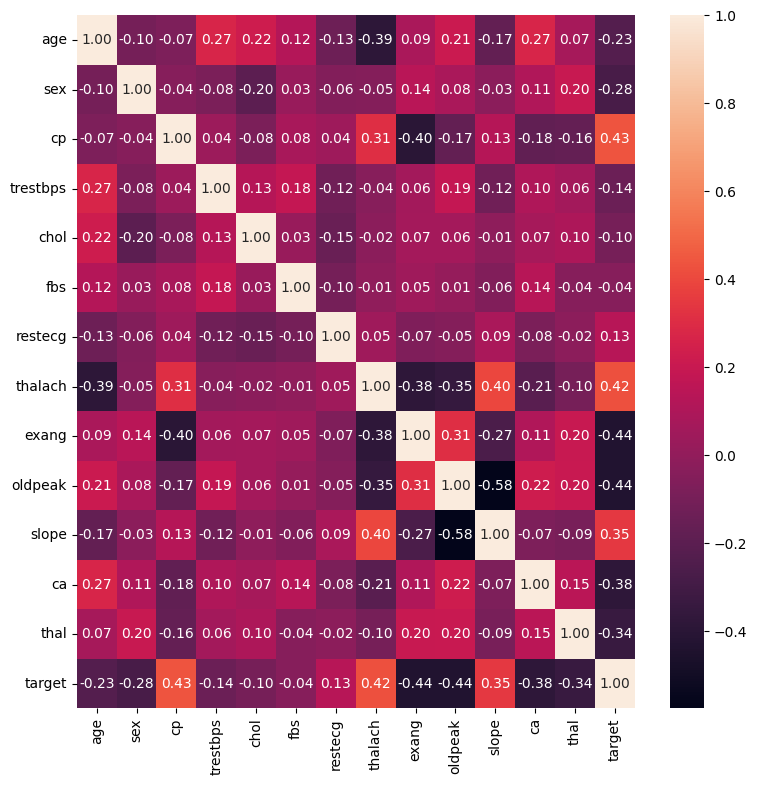

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
age,1.000000,-0.103240,-0.071966,0.271121,0.219823,0.121243,-0.132696,-0.390227,0.088163,0.208137,-0.169105,0.271551,0.072297,-0.229324
sex,-0.103240,1.000000,-0.041119,-0.078974,-0.198258,0.027200,-0.055117,-0.049365,0.139157,0.084687,-0.026666,0.111729,0.198424,-0.279501
cp,-0.071966,-0.041119,1.000000,0.038177,-0.081641,0.079294,0.043581,0.306839,-0.401513,-0.174733,0.131633,-0.176206,-0.163341,0.434854
trestbps,0.271121,-0.078974,0.038177,1.000000,0.127977,0.181767,-0.123794,-0.039264,0.061197,0.187434,-0.120445,0.104554,0.059276,-0.138772
chol,0.219823,-0.198258,-0.081641,0.127977,1.000000,0.026917,-0.147410,-0.021772,0.067382,0.064880,-0.014248,0.074259,0.100244,-0.099966
fbs,0.121243,0.027200,0.079294,0.181767,0.026917,1.000000,-0.104051,-0.008866,0.049261,0.010859,-0.061902,0.137156,-0.042177,-0.041164
restecg,-0.132696,-0.055117,0.043581,-0.123794,-0.147410,-0.104051,1.000000,0.048411,-0.065606,-0.050114,0.086086,-0.078072,-0.020504,0.134468
thalach,-0.390227,-0.049365,0.306839,-0.039264,-0.021772,-0.008866,0.048411,1.000000,-0.380281,-0.349796,0.395308,-0.207888,-0.098068,0.422895
exang,0.088163,0.139157,-0.401513,0.061197,0.067382,0.049261,-0.065606,-0.380281,1.000000,0.310844,-0.267335,0.107849,0.197201,-0.438029
oldpeak,0.208137,0.084687,-0.174733,0.187434,0.064880,0.010859,-0.050114,-0.349796,0.310844,1.000000,-0.575189,0.221816,0.202672,-0.438441


In [ ]:
# Correlation analysis
#Creating correlation matrices and heatmaps
correlation_matrix = df.corr()

plt.figure(figsize=(9, 9))
sns.heatmap(correlation_matrix, annot=True, fmt='.2f')
plt.show()
correlation_matrix

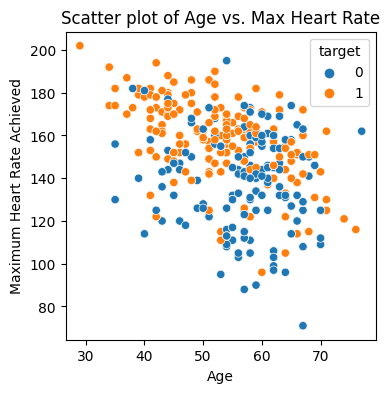

In [ ]:
# Use scatter plots to visualize the relationship between pairs of features
# Let's visualize 'age' and 'thalach' as an example
plt.figure(figsize=(4, 4))
sns.scatterplot(x='age', y='thalach', hue='target', data=df)
plt.xlabel('Age')
plt.ylabel('Maximum Heart Rate Achieved')
plt.title('Scatter plot of Age vs. Max Heart Rate')
plt.show()

In [ ]:
!pip install umap-learn

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 90.9/90.9 kB 1.4 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 55.8/55.8 kB 6.7 MB/s eta 0:00:00
  Created wheel for umap-learn: filename=umap_learn-0.5.5-py3-none-any.whl size=86832 sha256=1422b83afdc8b29aac1b70aa97547855d704846a979cae3d3739e793eb9f7d0a
  Stored in directory: /root/.cache/pip/wheels/3a/70/07/428d2b58660a1a3b431db59b806a10da736612ebbc66c1bcc5
Successfully built umap-learn


In [ ]:
!pip install holoviews

In [ ]:
!pip install -U ipykernel

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 114.6/114.6 kB 1.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 12.6 MB/s eta 0:00:00
  Attempting uninstall: ipykernel
    Found existing installation: ipykernel 5.5.6
    Uninstalling ipykernel-5.5.6:
      Successfully uninstalled ipykernel-5.5.6
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
google-colab 1.0.0 requires ipykernel==5.5.6, but you have ipykernel 6.27.1 which is incompatible.


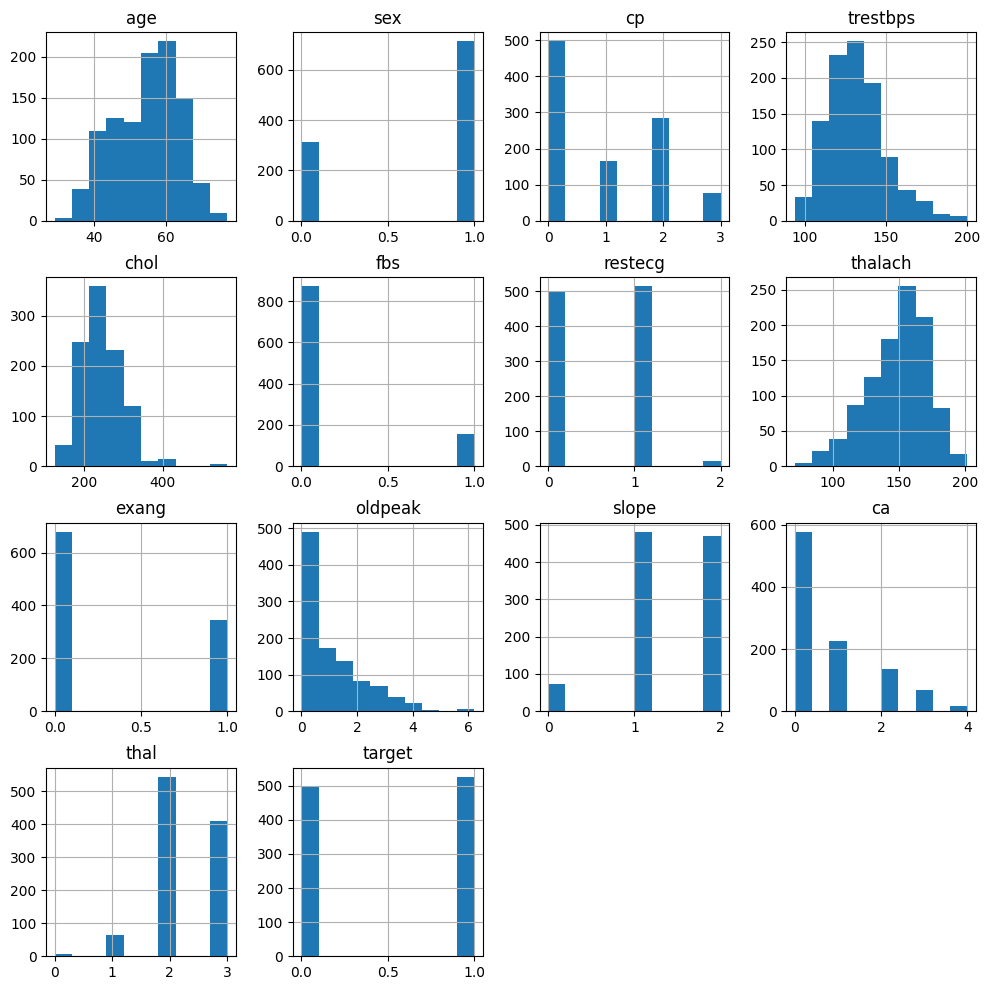

In [ ]:
# plot histograms for each variable
data.hist(figsize = (12, 12))
plt.show()

In [ ]:
# Normalize or standardize the numerical features if required
# Assuming all features except 'target' need to be standardized
# ranges from -1 to 1

In [ ]:
scaler = StandardScaler()
scaled_features = scaler.fit_transform(df.drop('target', axis=1))

Text(0, 0.5, 'Principal Component 2')

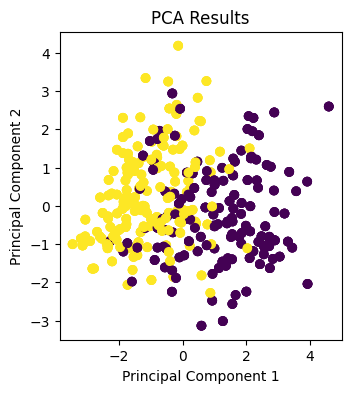

In [ ]:
from sklearn.decomposition import PCA

# PCA
pca = PCA(n_components=2)
pca_result = pca.fit_transform(scaled_features)
y = df['target']
# PCA Plot
plt.figure(figsize=(8, 4))
plt.subplot(1, 2, 1)
plt.scatter(pca_result[:, 0], pca_result[:, 1], c=y)
plt.title('PCA Results')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')

[t-SNE] Computing 121 nearest neighbors...
[t-SNE] Indexed 1025 samples in 0.003s...
[t-SNE] Computed neighbors for 1025 samples in 0.092s...
[t-SNE] Computed conditional probabilities for sample 1000 / 1025
[t-SNE] Computed conditional probabilities for sample 1025 / 1025
[t-SNE] Mean sigma: 1.615669
[t-SNE] KL divergence after 250 iterations with early exaggeration: 66.887810
[t-SNE] KL divergence after 300 iterations: 1.097877


Text(0, 0.5, 't-SNE Feature 2')

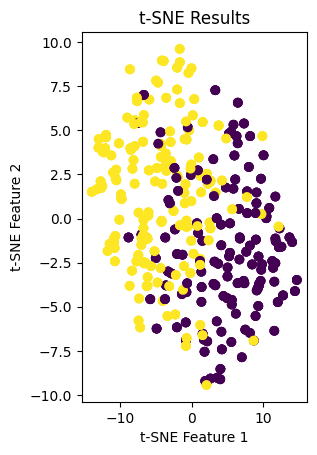

In [ ]:
from sklearn.manifold import TSNE
# t-SNE
tsne = TSNE(n_components=2, verbose=1, perplexity=40, n_iter=300)
tsne_result = tsne.fit_transform(scaled_features)
# t-SNE Plot
plt.subplot(1, 2, 2)
plt.scatter(tsne_result[:, 0], tsne_result[:, 1], c=y)
plt.title('t-SNE Results')
plt.xlabel('t-SNE Feature 1')
plt.ylabel('t-SNE Feature 2')

/usr/local/lib/python3.10/dist-packages/umap/umap_.py:1943: UserWarning: n_jobs value -1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(f"n_jobs value {self.n_jobs} overridden to 1 by setting random_state. Use no seed for parallelism.")


Text(0.5, 1.0, 'UMAP Results')

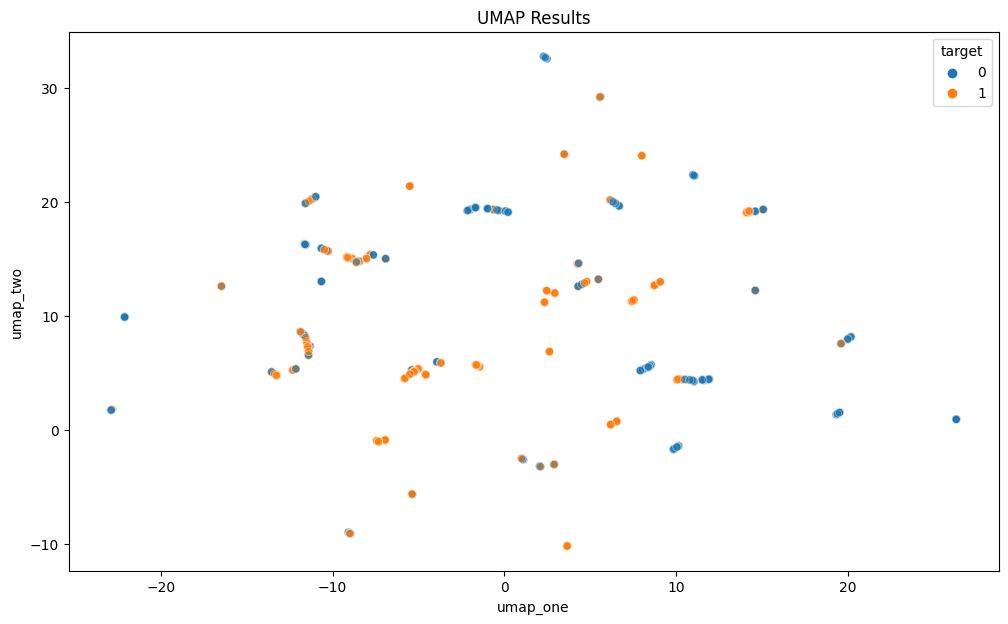

In [ ]:
import umap
# UMAP
umap_reducer = umap.UMAP(n_neighbors=50, min_dist=0.0, n_components=2, random_state=42)
umap_result = umap_reducer.fit_transform(scaled_features)
df['umap_one'] = umap_result[:, 0]
df['umap_two'] = umap_result[:, 1]

# Uncomment the following to plot UMAP results if UMAP is installed
plt.figure(figsize=(12, 7))
sns.scatterplot(x='umap_one', y='umap_two', hue='target', data=df, legend="full", alpha=0.5)
plt.title('UMAP Results')

Class Counts:
 1    526
0    499
Name: target, dtype: int64

Class Distribution (%):
 1    51.317073
0    48.682927
Name: target, dtype: float64


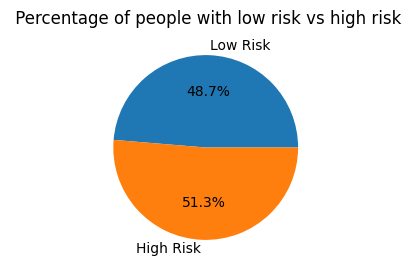

In [ ]:
#Class Distribution

# Count the instances of each class label
class_counts = df['target'].value_counts()

# Calculate the percentage of each class
class_distribution = class_counts / len(df) * 100

# Output the counts and the percentage of each class
print("Class Counts:\n", class_counts)
print("\nClass Distribution (%):\n", class_distribution)

#This distribution indicates a relatively balanced dataset with respect to the target variable.
#There is no significant class imbalance, as both classes are almost equally represented

plt.figure(figsize=(3 , 3))
labels=["Low Risk" , "High Risk"]
sizes=[df.target.value_counts()[0] ,df.target.value_counts()[1]]
plt.pie(sizes, labels=labels , autopct='%1.1f%%')
plt.title(" Percentage of people with low risk vs high risk")
plt.axis('off')
plt.show()


In [ ]:
# Define features and target

X = df.drop(columns = "target", axis=1)
Y = df["target"]

In [ ]:
X.shape

(1025, 15)

In [ ]:
Y.shape

(1025,)

In [ ]:
#Splitting dataset
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, stratify=Y, random_state=2)

In [ ]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)


In [ ]:
X.shape, X_train.shape, X_test.shape

((1025, 15), (820, 15), (205, 15))

In [ ]:
Y.shape, y_train.shape, y_test.shape

((1025,), (820,), (205,))

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
m1="Logistic Regression"
lr_model = LogisticRegression(solver="liblinear",random_state=2 )
# training the model with training data
lr_model.fit(X_train, y_train)
# Accuracy on training data
X_train_prediction = lr_model.predict(X_train)
training_data_accuracy = accuracy_score(X_train_prediction,y_train)
print(f"Accuracy on Training data: ",training_data_accuracy*100)
# Accuracy on test data
X_test_prediction = lr_model.predict(X_test)
test_data_accuracy_lr = accuracy_score(X_test_prediction, y_test)
print(f"Accuracy on Test data: ",test_data_accuracy_lr*100)

#Confussion matrix
LR_conf_matrix = confusion_matrix(y_test, X_test_prediction)
print("Confusion matrix")
print(LR_conf_matrix)


Accuracy on Training data:  89.14634146341463
Accuracy on Test data:  82.92682926829268
Confusion matrix
[[80 20]
 [15 90]]


In [ ]:
from sklearn.naive_bayes import GaussianNB
m2="Naive Bayes"
nb = GaussianNB()
# training the model with training data
nb.fit(X_train,y_train)
# Accuracy on training data
X_train_prediction = nb.predict(X_train)
training_data_accuracy = accuracy_score(X_train_prediction,y_train)
print(f"Accuracy on Training data: ",training_data_accuracy*100)
# Accuracy on test data
X_test_prediction = nb.predict(X_test)
test_data_accuracy_nb = accuracy_score(X_test_prediction, y_test)
print(f"Accuracy on Test data: ",test_data_accuracy_nb*100)
#Confussion matrix
nb_conf_matrix = confusion_matrix(y_test, X_test_prediction)
print("Confussion matrix")
print(nb_conf_matrix)

Accuracy on Training data:  84.26829268292683
Accuracy on Test data:  78.04878048780488
Confussion matrix
[[73 27]
 [18 87]]


In [ ]:
from sklearn.ensemble import RandomForestClassifier
m3="Random Forest"
rf = RandomForestClassifier(n_estimators=100, criterion="entropy",max_depth=7, min_samples_leaf=2, max_features="sqrt",random_state=2)
# training the model with training data
rf.fit(X_train,y_train)
# Accuracy on training data
X_train_prediction = rf.predict(X_train)
training_data_accuracy = accuracy_score(X_train_prediction,y_train)
print(f"Accuracy on Training data: ",training_data_accuracy*100)

# Accuracy on test data
X_test_prediction = rf.predict(X_test)
test_data_accuracy_rf = accuracy_score(X_test_prediction, y_test)
print(f"Accuracy on Test data: ",test_data_accuracy_rf*100)


#Confussion matrix
rf_conf_matrix = confusion_matrix(y_test, X_test_prediction)
print("Confussion matrix")
print(rf_conf_matrix)

Accuracy on Training data:  99.39024390243902
Accuracy on Test data:  97.07317073170731
Confussion matrix
[[ 98   2]
 [  4 101]]


In [ ]:
from xgboost import  XGBClassifier
from sklearn.ensemble import GradientBoostingClassifier
m4="Gradient Boost"
Egb = GradientBoostingClassifier(n_estimators=100, subsample= 0.2, min_samples_leaf=2,max_depth=5,random_state=2,max_features="sqrt")
# training the model with training data
Egb.fit(X_train,y_train)
# Accuracy on training data
X_train_prediction = Egb.predict(X_train)
training_data_accuracy = accuracy_score(X_train_prediction,y_train)
print(f"Accuracy on Training data: ",training_data_accuracy*100)
# Accuracy on test data
X_test_prediction = Egb.predict(X_test)
test_data_accuracy_egb = accuracy_score(X_test_prediction, y_test)
print(f"Accuracy on Test data: ",test_data_accuracy_egb*100)

#Confussion matrix
Egb_conf_matrix = confusion_matrix(y_test, X_test_prediction)
print("Confussion matrix")
print(Egb_conf_matrix)

Accuracy on Training data:  100.0
Accuracy on Test data:  98.53658536585365
Confussion matrix
[[100   0]
 [  3 102]]


In [ ]:
m6="XGB"
xgb = XGBClassifier()
xgb.fit(X_train, y_train)
# Accuracy on training data
X_train_predict= xgb.predict(X_train)
training_data_accuracy=accuracy_score(X_train_predict, y_train)
print(f"Accuracy on Training data: ",training_data_accuracy*100)
# Accuracy on test data
X_test_predict= xgb.predict(X_test)
test_data_accuracy_xgb=accuracy_score(X_test_predict, y_test)
print(f"Accuracy on Test data: ",test_data_accuracy_xgb*100)
#Confussion matrix
knn_confusion_matrix=  confusion_matrix(y_test,X_test_predict)
print("Confusion Matrix")
print(knn_confusion_matrix)

Accuracy on Training data:  100.0
Accuracy on Test data:  100.0
Confusion Matrix
[[100   0]
 [  0 105]]


In [ ]:
from sklearn.neighbors import KNeighborsClassifier
m5="K-Neighbour"
knn = KNeighborsClassifier(n_neighbors=20, algorithm="auto" )
# train on the training set
knn.fit(X_train, y_train)
# Accuracy on training data
X_train_predict= knn.predict(X_train)
training_data_accuracy=accuracy_score(X_train_predict, y_train)
print(f"Accuracy on Training data: ",training_data_accuracy*100)
# Accuracy on test data
X_test_predict= knn.predict(X_test)
test_data_accuracy_knn=accuracy_score(X_test_predict, y_test)
print(f"Accuracy on Test data: ",test_data_accuracy_knn*100)
#Confussion matrix
knn_confusion_matrix=  confusion_matrix(y_test,X_test_predict)
print("Confusion Matrix")
print(knn_confusion_matrix)


Accuracy on Training data:  85.85365853658537
Accuracy on Test data:  80.97560975609757
Confusion Matrix
[[82 18]
 [21 84]]


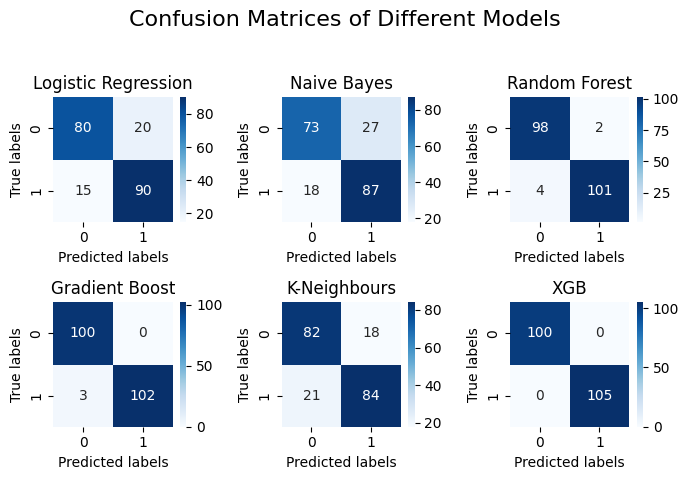

In [ ]:
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt

# Dictionary to store confusion matrices
confusion_matrices = {}

# Existing code for training models...

# Logistic Regression
lr_model.fit(X_train, y_train)
lr_predictions = lr_model.predict(X_test)
confusion_matrices['Logistic Regression'] = confusion_matrix(y_test, lr_predictions)

# Naive Bayes
nb.fit(X_train, y_train)
nb_predictions = nb.predict(X_test)
confusion_matrices['Naive Bayes'] = confusion_matrix(y_test, nb_predictions)

# Random Forest
rf.fit(X_train, y_train)
rf_predictions = rf.predict(X_test)
confusion_matrices['Random Forest'] = confusion_matrix(y_test, rf_predictions)

# Gradient Boost
Egb.fit(X_train, y_train)
egb_predictions = Egb.predict(X_test)
confusion_matrices['Gradient Boost'] = confusion_matrix(y_test, egb_predictions)

# K-Neighbours
knn.fit(X_train, y_train)
knn_predictions = knn.predict(X_test)
confusion_matrices['K-Neighbours'] = confusion_matrix(y_test, knn_predictions)

# XGB
xgb.fit(X_train, y_train)
xgb_predictions = xgb.predict(X_test)
confusion_matrices['XGB'] = confusion_matrix(y_test, xgb_predictions)

# Display all confusion matrices
fig, axes = plt.subplots(nrows=2, ncols=3, figsize=(7, 5))
fig.suptitle('Confusion Matrices of Different Models', fontsize=16)

for ax, (model, matrix) in zip(axes.flatten(), confusion_matrices.items()):
    sns.heatmap(matrix, annot=True, fmt='d', ax=ax, cmap='Blues')
    ax.set_title(model)
    ax.set_xlabel('Predicted labels')
    ax.set_ylabel('True labels')

plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.show()


In [ ]:
results = {"Models": [m1, m2, m3 ,m4, m5, m6],
           "Accuracy": [test_data_accuracy_lr, test_data_accuracy_nb, test_data_accuracy_rf,test_data_accuracy_egb, test_data_accuracy_knn, test_data_accuracy_xgb]}

for (key, value) in results.items():
    if key=="Accuracy":
        results[key]=  [item*100 for item in results[key]]


result_df=pd.DataFrame(results)

result_df

,Models,Accuracy
0,Logistic Regression,82.926829
1,Naive Bayes,78.048780
2,Random Forest,97.073171
3,Gradient Boost,98.536585
4,K-Neighbour,80.975610
5,XGB,100.000000


In [ ]:
from sklearn.model_selection import StratifiedKFold, GridSearchCV
from sklearn.model_selection import cross_val_score
# Prepare cross-validation strategy
cv_strategy = StratifiedKFold(n_splits=5)

# Dictionary to hold all models
models = {
    "Logistic Regression": LogisticRegression(solver="liblinear",random_state=2),
    "Naive Bayes": GaussianNB(),
    "Random Forest": RandomForestClassifier(random_state=2),
    "Gradient Boost": GradientBoostingClassifier(random_state=2),
    "K-Neighbours": KNeighborsClassifier(),
    "XGB": XGBClassifier()
}


In [ ]:
# Dictionary to hold hyperparameters for each model
hyperparameters = {
    "Logistic Regression": {
        'C': np.logspace(-3, 3, 10),
        'penalty': ['l1', 'l2']
    },
    "Naive Bayes": {
        # Normally Naive Bayes doesn't have hyperparameters to tune for GaussianNB, but you could potentially use others
    },
    "Random Forest": {
        'n_estimators': [10, 50, 100, 200],
        'max_depth': [None, 5, 10, 20],
        'min_samples_leaf': [1, 2, 4]
    },
    "Gradient Boost": {
        'n_estimators': [50, 100, 200],
        'learning_rate': [0.01, 0.1, 0.2],
        'subsample': [0.5, 0.7, 1.0],
        'max_depth': [3, 5, 7]
    },
    "K-Neighbours": {
        'n_neighbors': [5, 10, 15, 20],
        'algorithm': ['auto', 'ball_tree', 'kd_tree', 'brute']
    },
    "XGB": {
        'n_estimators': [50, 100, 200],
        'learning_rate': [0.01, 0.1, 0.2],
        'max_depth': [3, 5, 7]
    }

}


In [ ]:

# Dictionary to hold results
results = {"Models": [], "Accuracy": [], "Cross-Validation Accuracy": [], "Is Overfitting": []}

# Loop through models and perform cross-validation and hyperparameter tuning
for model_name, model in models.items():
    print(f"Training and tuning {model_name}...")

    # Perform hyperparameter tuning
    if model_name in hyperparameters:
        grid_search = GridSearchCV(model, hyperparameters[model_name], cv=cv_strategy, scoring='accuracy')
        grid_search.fit(X_train, y_train)
        model = grid_search.best_estimator_
        print(f"Best parameters for {model_name}: {grid_search.best_params_}")

    # Perform cross-validation
    cv_scores = cross_val_score(model, X_train, y_train, cv=cv_strategy)
    cv_mean = cv_scores.mean()
    results["Cross-Validation Accuracy"].append(cv_mean)

    # Check for overfitting
    model.fit(X_train, y_train)
    training_accuracy = accuracy_score(y_train, model.predict(X_train))
    validation_accuracy = accuracy_score(y_test, model.predict(X_test))
    is_overfitting = training_accuracy > validation_accuracy
    results["Is Overfitting"].append(is_overfitting)

    # Add accuracy and model to results
    results["Models"].append(model_name)
    results["Accuracy"].append(validation_accuracy * 100)

    print(f"{model_name} training complete.")

# Convert results to DataFrame for display
#result_df = pd.DataFrame(results)
#print(result_df)



Training and tuning Logistic Regression...
Best parameters for Logistic Regression: {'C': 0.46415888336127775, 'penalty': 'l2'}
Logistic Regression training complete.
Training and tuning Naive Bayes...
Best parameters for Naive Bayes: {}
Naive Bayes training complete.
Training and tuning Random Forest...
Best parameters for Random Forest: {'max_depth': None, 'min_samples_leaf': 1, 'n_estimators': 50}
Random Forest training complete.
Training and tuning Gradient Boost...
Best parameters for Gradient Boost: {'learning_rate': 0.2, 'max_depth': 5, 'n_estimators': 100, 'subsample': 1.0}
Gradient Boost training complete.
Training and tuning K-Neighbours...
Best parameters for K-Neighbours: {'algorithm': 'auto', 'n_neighbors': 10}
K-Neighbours training complete.
Training and tuning XGB...
Best parameters for XGB: {'learning_rate': 0.1, 'max_depth': 7, 'n_estimators': 100}
XGB training complete.


                Models    Accuracy  Cross-Validation Accuracy  Is Overfitting
3       Gradient Boost  100.000000                   0.985366           False
5                  XGB  100.000000                   0.984146           False
2        Random Forest  100.000000                   0.981707           False
0  Logistic Regression   82.926829                   0.881707            True
4         K-Neighbours   85.365854                   0.864634            True
1          Naive Bayes   78.048780                   0.841463            True


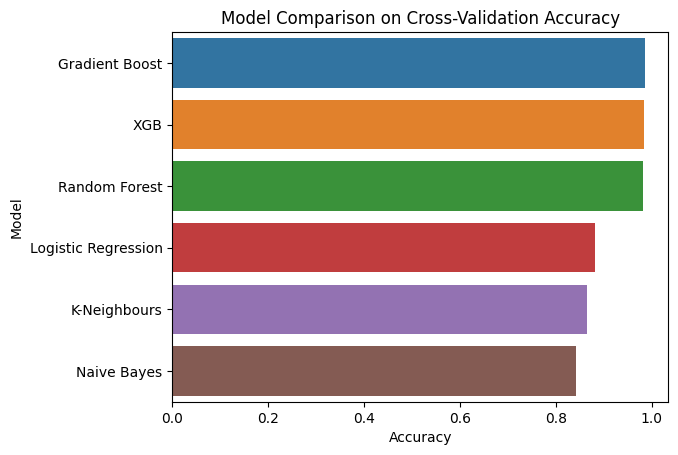

In [ ]:
# Code for evaluating and displaying the results of all models

# Convert results to DataFrame for better visualization
final_results_df = pd.DataFrame(results)

# Sort the results by the 'Cross-Validation Accuracy' to see the best models at the top
final_results_df.sort_values(by='Cross-Validation Accuracy', ascending=False, inplace=True)

# Display the final DataFrame
print(final_results_df)

# Plot the accuracies using seaborn
import seaborn as sns

sns.barplot(x='Cross-Validation Accuracy', y='Models', data=final_results_df)
plt.title('Model Comparison on Cross-Validation Accuracy')
plt.xlabel('Accuracy')
plt.ylabel('Model')
plt.show()


In [ ]:
final_results_df

,Models,Accuracy,Cross-Validation Accuracy,Is Overfitting
3,Gradient Boost,100.000000,0.985366,False
5,XGB,100.000000,0.984146,False
2,Random Forest,100.000000,0.981707,False
0,Logistic Regression,82.926829,0.881707,True
4,K-Neighbours,85.365854,0.864634,True
1,Naive Bayes,78.048780,0.841463,True
